### **Setup Interpreter**

Some test code that shows how to use **mllibs**

In [2]:
import pandas as pd
from mllibs.nlpm import nlpm
from mllibs.nlpi import nlpi
from mllibs.eda.meda_scplot import eda_scplot
from mllibs.eda.meda_psplot import eda_psplot
from mllibs.eda.meda_splot import eda_splot
from mllibs.eda.meda_simple import eda_simple
from mllibs.nlp.mencoder import encoder
from mllibs.nlp.membedding import embedding
from mllibs.stats.mstats_tests import stats_tests
from mllibs.libop.mlibop import libop_general
from mllibs.pd.mpd_df import pd_df
from mllibs.pd.mpd_talktodata import pd_talktodata
# from mllibs.moutliers import data_outliers
# from mllibs.mdsplit import make_fold
# from mllibs.musldimred import make_dimred 

nlpi.silent = True
nlpi.activate = False
# link all modules into one collection
collection = nlpm()
collection.load([
                 eda_simple(),    # [eda] simple pandas EDA
                 eda_splot(),     # [eda] standard seaborn plots
                 eda_scplot(),    # [eda] seaborn column plots
                 encoder(),       # [nlp] standard encoding methods 
                 embedding(),     # [nlp] embedding methods
                 eda_psplot(),    # [eda] plotly express visualisations
                 stats_tests(),   # [stats] statistical tests for list data
                 libop_general(), # [library] mllibs related functionality
                 pd_df(),         # [eda] simple pandas operations
                 pd_talktodata()  # [eda] pandas data exploration 
                ])

collection.train()
interpreter = nlpi(collection)
interpreter.load_sample_data()
# interpreter.store_data(pd.read_csv('penguins.csv'),'penguins') 
interpreter.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])
# interpreter['what data is available']


[note] initialising nlpm, please load modules using .load(list)
[note] loading modules ...
[note] making module summary labels...
[note] training  [gt] [RandomForestClassifier()] [accuracy,1.0]
[note] models trained!


In [3]:
from sklearn.model_selection import train_test_split

ldata = nlpi.data['iris']['data']
train,test = train_test_split(ldata)

# store data
interpreter.store_data({'train':train,'test':test})

'''

pd_df library tests

'''

interpreter['concatenate two dataframes train test axis: 0 join: inner']

int
str
str


,token,index_id,type,ner_tags,data,dtype,column,ttype,ttype_storage,token_arg,token_argv,vocab,keep_token
0,concatenate,0,uni,O,NaN,NaN,NaN,str,concatenate,False,0,True,False
1,two,1,uni,O,NaN,NaN,NaN,str,two,False,0,True,False
2,dataframes,2,uni,O,NaN,NaN,NaN,str,dataframes,False,0,True,False
3,axis,3,uni,B-PARAM,NaN,NaN,NaN,str,axis,True,0,False,False
4,0,4,uni,O,NaN,NaN,NaN,int,0,False,True,False,False
5,join,5,uni,B-PARAM,NaN,NaN,NaN,str,join,True,0,False,False
6,inner,6,uni,O,NaN,NaN,NaN,str,inner,False,True,False,False


keep_idx []
remove_idx b4: [3, 4, 5, 6]
remove_idx aft: [3, 4, 5, 6]


,token,index_id,type,ner_tags,data,dtype,column,ttype,ttype_storage,token_arg,token_argv,vocab,keep_token,nts1,nts2
0,concatenate,0,uni,O,NaN,NaN,NaN,str,concatenate,False,0,True,False,None,None
1,two,1,uni,O,NaN,NaN,NaN,str,two,False,0,True,False,O,None
2,dataframes,2,uni,O,NaN,NaN,NaN,str,dataframes,False,0,True,False,O,O


[note] found relevant global task [dfconcat] w/ [0.8] certainty!


In [2]:
# # lst = pd.DataFrame({'A':['red','yellow',None,'orange',None],'B':[None,None,'red','orange','blue']})
# # lst = lst[['A']]

# # # lst['A'].isna()
# # lst[lst.isna().any(axis=1)]


# '''

# # find all B-SOURCE + I-SOURCE combinations

# '''

# ls = interpreter.token_info
# ls['shift'] = ls['ner_tags'].shift(-1)
# tdf = ls[['ner_tags','shift']] 
# combinations = list(tdf[(tdf['ner_tags'] == 'B-PARAM')].index)

# lst_temp = [ [i] for i in combinations]
# for lst in lst_temp:
#     lst.append(lst[0] + 1)

# # Iterate over each row in the DataFrame
# # and store O tokens

# lst_O = []; condition_met = False
# for lst in lst_temp:

#     tlst = lst.copy()
#     for index, row in ls[lst[0]+2:].iterrows():
        
#         # Check the condition for each row
#         if row['ner_tags'] == 'O':
#             # Set the flag to True if the condition is met
#             condition_met = True
#             tlst.append(index)
#         elif condition_met:
#             break

#     lst_O.append(tlst)

# lst_O

In [3]:

# '''

# Find all B-SOURCE + I-SOURCE combinations

# '''

# ls = interpreter.token_info
# ls['shift'] = ls['ner_tags'].shift(-1)
# tdf = ls[['ner_tags','shift']] 
# combinations = list(tdf[(tdf['ner_tags'] == 'B-SOURCE') & (tdf['shift'] == 'I-SOURCE')].index)

# lst_temp = [ [i] for i in combinations]
# for lst in lst_temp:
#     lst.append(lst[0] + 1)

# # Iterate over each row in the DataFrame
# # and store O tokens

# lst_O = []; condition_met = False
# for lst in lst_temp:

#     tlst = lst.copy()
#     for index, row in ls[lst[0]+2:].iterrows():
#         # Check the condition for each row
#         if row['ner_tags'] == 'O':
#             # Set the flag to True if the condition is met
#             condition_met = True
#             tlst.append(index)
#         elif condition_met:
#             # If the condition was previously met, print the next row and exit the loop
#             print("Next row:", row)
#             break

#     lst_O.append(tlst)

# lst_O

In [4]:
# # Iterate over each row in the DataFrame
# # and store O tokens

# lst_O = []; condition_met = False
# for lst in lst_temp:

#     tlst = lst.copy()
#     for index, row in ls[lst[0]+2:].iterrows():
#         # Check the condition for each row
#         if row['ner_tags'] == 'O':
#             # Set the flag to True if the condition is met
#             condition_met = True
#             tlst.append(index)
#         elif condition_met:
#             # If the condition was previously met, print the next row and exit the loop
#             print("Next row:", row)
#             break

#     lst_O.append(tlst)

# lst_O

In [5]:
'''

mpd_talktodata | meda_simple examples

'''

# interpreter['show the distribution of column island in penguins']
interpreter['show the all the missing data in penguins']
# interpreter['show missing data in col sex in data penguins']
# interpreter['show missing data in penguins'] 
# interpreter['concatenate two dataframes train test axis: 0 join: inner']
# interpreter['For penguins show missing data']
# interpreter['show dataframe information for penguins']

,token,index_id,type,ner_tags,data,dtype,column,ttype,ttype_storage,token_arg,token_argv,vocab,keep_token
0,show,0,uni,O,NaN,NaN,NaN,str,show,False,0,True,False
1,the,1,uni,O,NaN,NaN,NaN,str,the,False,0,True,False
2,all,2,uni,O,NaN,NaN,NaN,str,all,False,0,True,False
3,the,3,uni,O,NaN,NaN,NaN,str,the,False,0,True,False
4,missing,4,uni,O,NaN,NaN,NaN,str,missing,False,0,True,False
5,data,5,uni,I-SOURCE,NaN,NaN,NaN,str,data,False,0,True,True
6,in,6,uni,B-SOURCE,NaN,NaN,NaN,str,in,False,0,True,True


[note] found relevant global task [dfall_na] w/ [0.66] certainty!
19 rows in total have missing data
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
[note] I've stored the missing rows


In [4]:
# from itertools import groupby

# ls = interpreter.token_info.copy()
# my_list = list(ls['vocab'])
# print(my_list)
  
# # group together values      
# result = [list(group) for key, group in groupby(my_list)]
# print(result)

# # group together indicies of values
# result = [[i for i, _ in group] for key, group in groupby(enumerate(my_list), key=lambda x: x[1]) if key is True]
# print(result)

# longest_subset = max(result,key=len)
# longest_subset = set(longest_subset)
# print(longest_subset)

# # ner tags which are not O (eg. PARAM/SOURCE)
# notO = [ i for i,j in enumerate(list(ls['ner_tags'])) if j != 'O' ]
# notO_set = set(notO)

# # find overlap
# overlap_idx = longest_subset & notO_set

# ls['keep_token'] = False
# ls.loc[list(overlap_idx),'keep_token'] = True
# ls

In [5]:
from itertools import groupby

# my_list = list(ls['vocab'])
        
# result = [list(group) for key, group in groupby(my_list)]
# print(result)
# result = [[i for i, _ in group] for key, group in groupby(enumerate(my_list), key=lambda x: x[1]) if key is True]
# print(result)

# longest_subset = max(result,key=len)
# longest_subset = set(longest_subset)
# longest_subset

# # ner tags which are not O (eg. PARAM/SOURCE)
# notO = [ i for i,j in enumerate(list(ls['ner_tags'])) if j != 'O' ]
# notO_set = set(notO)
# notO_set

# # find overlap
# overlap_idx = longest_subset & notO_set
# overlap_idx

# ls['keep_token'] = False
# ls.loc[list(overlap_idx),'keep_token'] = True
# ls

In [62]:
ls = interpreter.token_info.copy()
ls['data'] = ls['data'].fillna(0)
ls['data'] = ls['data'].astype(int)
ldata = ls[ls['ner_tags'].isin(['B-SOURCE','I-SOURCE'])]

# # lst0 = list(ls['ner_tags'])
# # lst1 = list(ls['ner_tags'].shift(-1))
# # lst1d = list(ls['data'].shift(-1))
# # lst2 = list(ls['ner_tags'].shift(-2))
# # lst2d = list(ls['data'].shift(-2))

# b_sources = [i for i, x in enumerate(lst0) if x == 'B-SOURCE']
# i_sources = [i for i, x in enumerate(lst0) if x == 'I-SOURCE']
# source_tokens = ['B-SOURCE','I-SOURCE']
# bad_token = ['B-PARAM']
# all_sources = source_tokens + bad_token

# Create an empty dictionary
dictionary = {}

# Iterate over the DataFrame rows
for index, row in ldata.iterrows():

    print(row)
    print('')
    
    if(index in b_sources or index in i_sources):
    
        # Get the current value of 'column1'
        key = row['token']
        
        # Get the shift values from 'column2' with a window of 4 rows
        values = ls.loc[index:index+3, 'ner_tags'].tolist()
        
        # Add the key-value pair to the dictionary
        dictionary[key] = values

# Print the dictionary
print(dictionary)
        

# # ls[ls['ner_tags'].isin(['B-SOURCE','I-SOURCE'])][

token                data
index_id                2
type                  uni
ner_tags         I-SOURCE
data                    0
dtype                 NaN
column                NaN
ttype                 str
ttype_storage        data
token_arg           False
token_argv              0
vocab                True
Name: 2, dtype: object

token                  in
index_id                3
type                  uni
ner_tags         B-SOURCE
data                    0
dtype                 NaN
column                NaN
ttype                 str
ttype_storage          in
token_arg           False
token_argv              0
vocab                True
Name: 3, dtype: object

token                  in
index_id                6
type                  uni
ner_tags         B-SOURCE
data                    0
dtype                 NaN
column                NaN
ttype                 str
ttype_storage          in
token_arg           False
token_argv              0
vocab                True
Name: 6, dtype: 

In [8]:
import numpy as np

PARAM_IDX = list(ls[ls['ner_tags'].isin(['B-PARAM','I-PARAM'])].index)
TOKEN_IDX = list(ls[ls['ner_tags'].isin(['B-PARAM','I-PARAM'])]['token'])
print(TOKEN_IDX)

ls['nts1'] = ls['ner_tags'].shift(1)
ls['nts2'] = ls['ner_tags'].shift(2)

# for all matching PARAM cases
lst_keep = [] 
for idx in PARAM_IDX:

    # keep conditions
    
    # cond1 = ls['nts1'].isin(['B-SOURCE','I-SOURCE'])
    cond2 = ls.loc[idx-1,'token_arg'] is not False  # not a token argument
    cond3 = ls.loc[idx-1,'data'] is False   # not a data source
    cond4 = ls['column'].isnull().iloc[idx-1]  # not a data source column (ie. it is None)
    
    if(cond2 and cond3 and cond4):
        lst_keep.append('keep')
    else:
        lst_keep.append('remove')
 



['axis', 'join']


['remove', 'remove']

In [5]:
interpreter.glr()['data'].shape
# interpreter.module_args

# interpreter = token.info
# list(ls[ ~ls['column'].isna() | (ls['ttype'].isin(['int','float']) | (ls['token_arg'].shift(1) == True) )].index) 
# ls[(ls['token_arg'].shift(1) == True) & (ls['ttype'] == 'str')]

(150, 6)

In [4]:
lsta = ['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
lstb = [4, 6, 7, 8]
mapper = dict(zip(lsta,lstb))

In [7]:
# data = {'x': ['body_mass_g'], 'y': ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']}

# for key,val in data.items():
#     print(list(map(mapper.get,val)))

ls = interpreter.token_info
ls

,token,index_id,type,ner_tags,data,dtype,column,ttype,ttype_storage,token_arg,token_argv,vocab
0,show,0,uni,O,NaN,NaN,NaN,str,show,False,0,True
1,missing,1,uni,O,NaN,NaN,NaN,str,missing,False,0,True
2,data,2,uni,I-SOURCE,NaN,NaN,NaN,str,data,False,0,True
3,in,3,uni,B-SOURCE,NaN,NaN,NaN,str,in,False,0,True
4,col,4,uni,B-PARAM,NaN,NaN,NaN,str,col,True,0,True
5,sex,5,uni,O,NaN,NaN,penguins,str,sex,False,True,False
6,in,6,uni,B-SOURCE,NaN,NaN,NaN,str,in,False,0,True
7,data,7,uni,I-SOURCE,NaN,NaN,NaN,str,data,False,0,True
8,penguins,8,uni,O,3.0,pd.DataFrame,NaN,str,penguins,False,0,False


In [ ]:
print(interpreter.module_args['join'])
print(interpreter.module_args['axis'])

In [1]:
interpreter.setpp({'figsize':[600,400],'template':'plotly_white'})

# [0] using active columns

# req = '''
# create plotly scatter plot
# x: body_mass_g y: {selected_columns}
# using penguins
# '''

# [1] regular notation (multiple y) (not working)

req = '''
mew: 1.5
create plotly scatterplot
x: body_mass_g y: bill_length_mm bill_depth_mm flipper_length_mm
using penguins
'''

# req = '''
# create plotly scatterplot
# x: body_mass_g y: bill_depth_mm flipper_length_mm
# using penguins
# '''

# [2] simple request one PARAM per column

# simple request one PARAM per column 
# req = '''
# create plotly scatterplot
# x: bill_depth_mm y: flipper_length_mm hue: island
# using penguins
# '''

# req = '''
# create plotly count heatmap
# x: bill_depth_mm y: flipper_length_mm hue: sex col: sex
# using penguins
# '''

# sample1 = list(np.random.normal(loc=0, scale=1, size=100))
# sample2 = list(np.random.normal(loc=1, scale=1, size=100))

# interpreter.store_data({'distribution_A':sample1,
                        # 'distribution_B':sample2})

# req = "one sample ttest using: distribution_B distribution_A popmean 10"

interpreter[req]

NameError: name 'interpreter' is not defined

In [3]:
# nlpi.silent = False
# interpreter['seaborn scatterplot using penguins x bill_length_mm y bill_depth_mm hue: island']

In [3]:


ls = interpreter.token_info.copy()
req_len = len(ls.index)

param_id = list(ls[ls['token_arg'] == True].index)

# Column Test

tcol = ls['column']
ls['column'] = ls['column'].fillna(0)
ls['token_argv'] = 0
for i in param_id:
    for i,row in ls[i+1:req_len].iterrows():
        if(row['column'] != 0):
            ls.loc[i,'token_argv'] = True
        else:
            break

# General 

ls['column'] = tcol

# ls['token_argv'] = 0
for i in param_id:
    for i,row in ls[i+1:req_len].iterrows():
        if(row['ttype'] is not 'str'):
            ls.loc[i,'token_argv'] = True
        else:
            break

# String Cases (not ideal - assumed next token case)

for i in param_id:
    next = ls[i+2]
    ls.loc[next,'token_argv'] = True


display(ls)



KeyError: 7

plot parameter updated!
[note] one source token format

[note] NER used to clean input text!
[input]
visualise column scatterplot for penguins x bill_length_mm hue sex
[after]
visualise column scatterplot 

[note] found relevant global task [col_scatter] w/ [0.78] certainty!
[note] one data source token has been set!


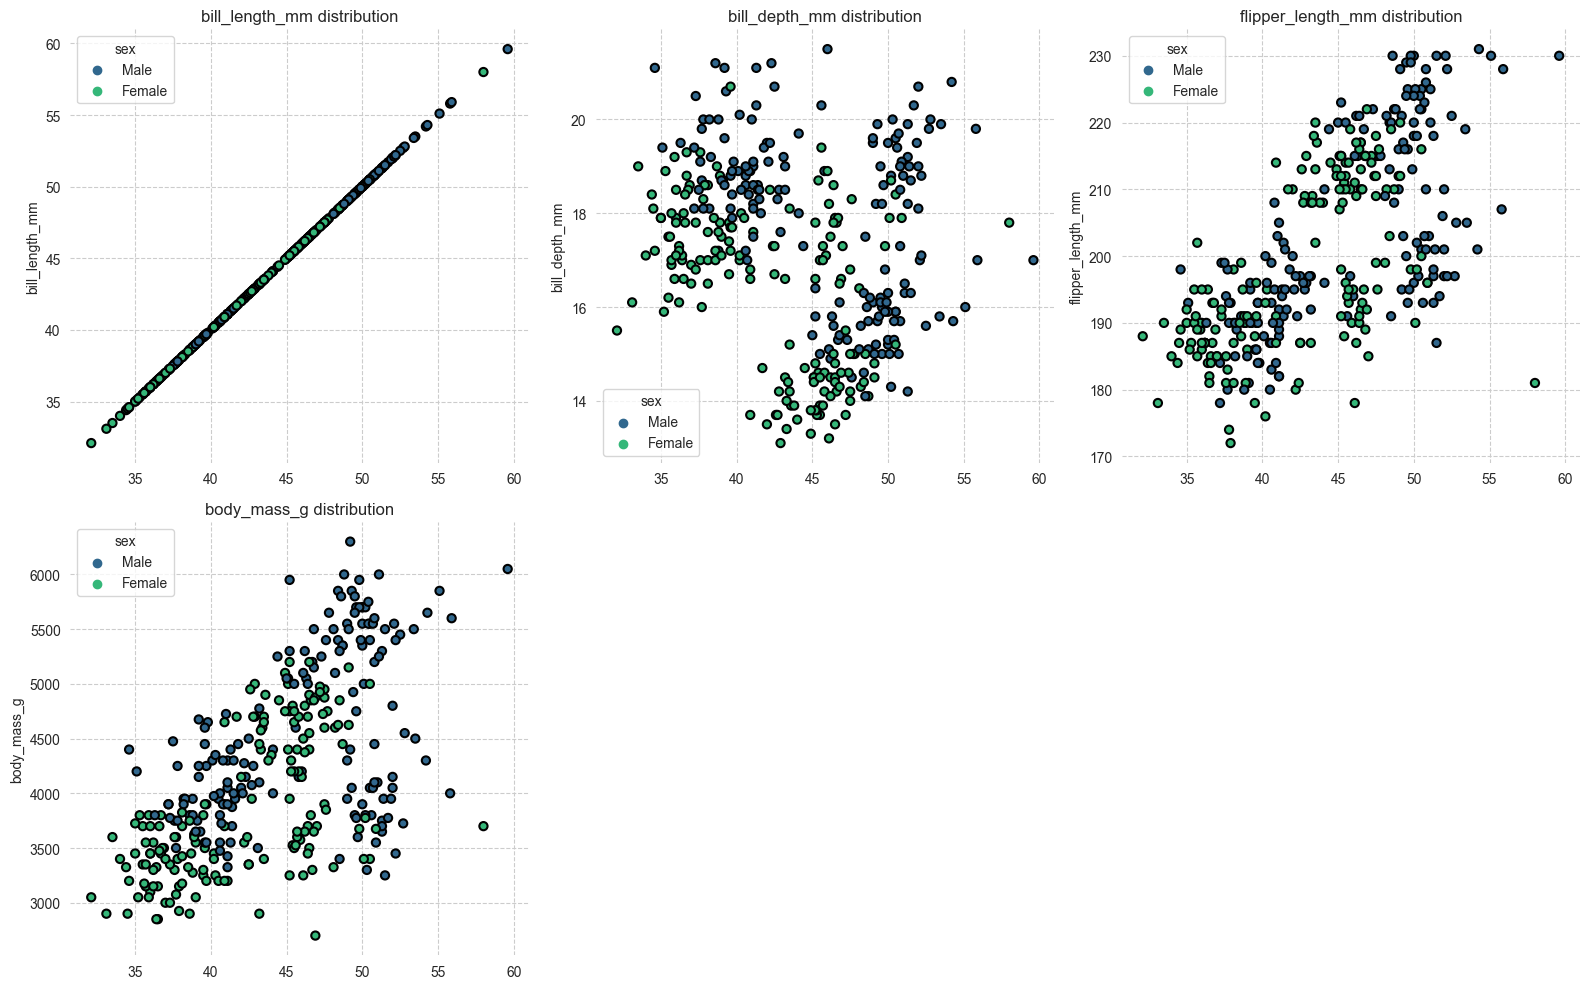

In [4]:
# '''

# Column Plots

# '''

interpreter.setpp
({'alpha':1.0,'fill':True,'mec':'k','mew':1.5,'stheme':'viridis','s':35})
interpreter['visualise column scatterplot for penguins x bill_length_mm hue sex']

In [5]:
interpreter.debug()

AttributeError: 'nlpi' object has no attribute '_seg_pred'

In [15]:
# from sklearn.ensemble import RandomForestClassifier
# from seaborn import load_dataset

# data = load_dataset('iris')
# X = data.iloc[:,:-1]
# y = data['species']

# model = RandomForestClassifier()
# model.fit(X,y)

# X_test = [4.9,3.0,1.4,0.2] # setosa
# model.predict_proba([X_test])

array([[1., 0., 0.]])

In [86]:
# interpreter['pca dimensionality reduction using data housing']
# interpreter.glr()['data']
# interpreter.store_data(interpreter.glr()['data'],'pca')

In [2]:
# plot first two dimensions
interpreter.setpp({'alpha':1.0,'fill':False,'mec':'k','mew':1,'s':25})
interpreter['create seaborn scatter plot using data pca x:dim_0 y:dim_1']

[note] no module passed decision threshold
[note] find_module error!


In [87]:
# # interpreter.fl('usldimred')
# interpreter.fl()

### Debugging

In [185]:
# collection.test('gt','create a boxplot')
# collection.predict_gtask('gt','create a column boxplot')

# eval("['A','B','C']")
# exec("x=['A','B','C']")

In [4]:
'''

Do some testing to make sure the corpus works well 

'''

# collection.dtest('eda_plot','create seaborn scatter plot')
collection.dtest('gt','plotly scatterplot for penguins x bill_length_mm y bill_depth_mm')

available models
dict_keys(['eda_plot', 'eda_pplot', 'eda_scplot', 'eda_simple', 'embedding', 'encoder', 'libop', 'stats_tests', 'ms', 'gt', 'token_subset', 'token_ner'])


,label,prediction
14,plscatter,0.45
15,plline,0.14
13,plviolin,0.12
33,torch_text_encode,0.07
12,plbarplot,0.04


In [ ]:
# collection.test('gt','create a boxplot')
# collection.predict_gtask('gt','create a column boxplot')

In [3]:
'''

Seaborn Plots

'''

req = '''
create seaborn relplot
x: bill_length_mm 
y: bill_depth_mm 
hue: island
kind: scatter
using penguins
'''

interpreter.setpp({'fill':True,'alpha':1,'mew':1})
interpreter[req]

# interpreter['create seaborn boxplot using housing y AGE x RAD']
# interpreter['create seaborn relplot x: bill_length_mm y: bill_depth_mm hue island col=island alpha=1.0 s:50 mew: 1 using penguins']
# interpreter['create seaborn relplot x: bill_length_mm y: bill_depth_mm hue island using penguins']

[note] one source token format
[note] found relevant global task [srelplot] w/ [0.52] certainty!


ValueError: Plot kind None not recognized

In [186]:
lst = [1,2,3,4,5,6]
for i,j in zip(lst,lst[1:]):
    print(i*j)

# eval("['A','B','C']")
exec("x=['A','B','C']")

2
6
12
20
30


In [16]:
# self.task_name
'plotly' in interpreter.task_info.loc['plscatter','description']

True